In [1]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

In [2]:
np.random.seed(444)
x = np.random.uniform(-3,3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [3]:
# 多项式回归Pipeline
def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
def polt_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    length = len(X_train)
    for i in range(1, length):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, length)], np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1, length)], np.sqrt(test_score), label='test')
    plt.axis([0,length+1,0,4])
    plt.legend()
    plt.show()

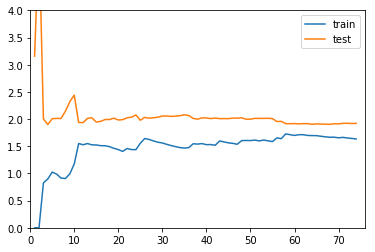

In [6]:
polt_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

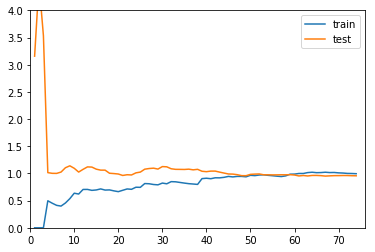

In [7]:
polt_learning_curve(PolynomialRegression(2), X_train, X_test, y_train, y_test)

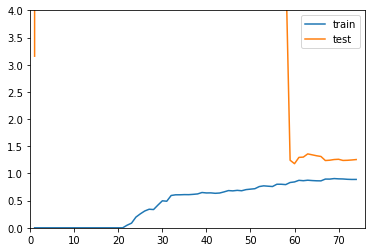

In [16]:
polt_learning_curve(PolynomialRegression(20), X_train, X_test, y_train, y_test)